## Analisa Dataset IMDB Top250 Movies
Nama: Saka Wijaya

In [579]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [580]:
#membacafile
df = pd.read_excel('IMDB Top250 Movies.xlsx')

In [581]:
#menampilkan 5 data pertama
df.head()

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
0,The Shawshank Redemption,9.3,2.9M,"October 14, 1994 (India)","$25,000,000 (estimated)",US & Canada,$28767189,US & Canada,$727327,Sep 25 1994,"$28,904,642"
1,The Godfather,9.2,2M,1978 (India),"$6,000,000 (estimated)",US & Canada,$136381073,US & Canada,$302393,Mar 19 1972,"$250,342,030"
2,The Dark Knight,9.0,2.9M,"July 18, 2008 (India)","$185,000,000 (estimated)",US & Canada,$534987076,US & Canada,$158411483,Jul 20 2008,"$1,008,486,720"
3,The Godfather: Part II,9.0,1.4M,1979 (India),"$13,000,000 (estimated)",US & Canada,$47834595,US & Canada,$171417,Nov 10 2019,"$47,962,897"
4,12 Angry Men,9.0,861K,"April 10, 1957 (United States)","$350,000 (estimated)",US & Canada,Not Found,US & Canada,Not Found,Not Found,"$2,667"


In [582]:
#menampilkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Movies Names                 250 non-null    object
 1   Rating out of 10             250 non-null    object
 2   Count of Ratings             249 non-null    object
 3   Release Date                 250 non-null    object
 4   Budget                       250 non-null    object
 5   Domestic Gross               250 non-null    object
 6   Domestic Gross2              250 non-null    object
 7   Domestic Weekend Gross       250 non-null    object
 8   Domestic Weekend             250 non-null    object
 9   Domestic Weekend Gross Date  250 non-null    object
 10  Worldwide Gross              245 non-null    object
dtypes: object(11)
memory usage: 21.6+ KB


In [583]:
#check missing value
df.isnull().sum()

Movies Names                   0
Rating out of 10               0
Count of Ratings               1
Release Date                   0
Budget                         0
Domestic Gross                 0
Domestic Gross2                0
Domestic Weekend Gross         0
Domestic Weekend               0
Domestic Weekend Gross Date    0
Worldwide Gross                5
dtype: int64

## Data Cleaning

In [584]:
#konversi domestic weekend gorss date ke datetime
df['Domestic Weekend Gross Date'] = pd.to_datetime(df['Domestic Weekend Gross Date'], errors='coerce').dt.date
print(df['Domestic Weekend Gross Date'])

0      1994-09-25
1      1972-03-19
2      2008-07-20
3      2019-11-10
4             NaT
          ...    
245    2011-08-14
246           NaT
247    1992-11-15
248    1990-11-11
249           NaT
Name: Domestic Weekend Gross Date, Length: 250, dtype: object


In [585]:
df['Worldwide Gross'].unique()

array(['$28,904,642', '$250,342,030', '$1,008,486,720', '$47,962,897',
       '$2,667', '$322,161,245', '$1,156,598,523', '$213,928,762',
       '$884,041,698', '$25,259,657', '$678,226,465', '$948,945,489',
       '$101,320,107', '$839,030,630', '$587,090,027', '$538,375,067',
       '$467,623,299', '$47,049,784', '$109,114,987', '$327,333,559',
       '$733,202,212', '$9,767,242', '$346,258', '$272,742,922',
       '$482,351,251', '$30,680,793', '$230,099,013', '$286,801,374',
       '$520,881,154', '$775,398,007', '$384,577,472', '$357,561,772',
       '$120,093,683', '$262,099,264', '$32,060,008', '$690,897,910',
       '$465,387,186', '$968,750,694', '$19,570,198', '$291,481,358',
       '$23,875,714', '$49,449,489', '$109,676,311', '$519,421',
       '$15,222', '$23,341,568', '$4,656,207', '$426,590,315',
       '$13,020,497', nan, '$37,039,396', '$5,435,312', '$106,285,522',
       '$50,419', '$104,911,478', '$426,076,293', '$138,288',
       '$40,047,236', '$521,320,168', '$389

In [586]:
# Menghapus simbol dollar ('$') dan koma (',') dari nilai di kolom 'Worldwide Gross'
df['Worldwide Gross'] = df['Worldwide Gross'].replace('[\$,]', '', regex=True)
df['Worldwide Gross'] = df['Worldwide Gross'].astype('Int64', errors='ignore')
df['Worldwide Gross']

0        28904642
1       250342030
2      1008486720
3        47962897
4            2667
          ...    
245     216639112
246         14729
247     504050219
248     424208848
249       4384642
Name: Worldwide Gross, Length: 250, dtype: Int64

In [587]:
df['Budget'].unique()

array(['$25,000,000 (estimated)', '$6,000,000 (estimated)',
       '$185,000,000 (estimated)', '$13,000,000 (estimated)',
       '$350,000 (estimated)', '$22,000,000 (estimated)',
       '$94,000,000 (estimated)', '$8,000,000 (estimated)',
       '$93,000,000 (estimated)', '$1,200,000 (estimated)',
       '$55,000,000 (estimated)', '$63,000,000 (estimated)',
       '$160,000,000 (estimated)', '$190,000,000 (estimated)',
       '$18,000,000 (estimated)', '$3,000,000 (estimated)',
       '$33,000,000 (estimated)', '$165,000,000 (estimated)',
       '$3,180,000 (estimated)', '¥125,000,000 (estimated)',
       '$19,000,000 (estimated)', '$70,000,000 (estimated)',
       'R$3,300,000 (estimated)', '$20,000,000 (estimated)',
       '$60,000,000 (estimated)', '$102,000,000 (estimated)',
       '$11,000,000 (estimated)', '$35,000,000 (estimated)',
       '$11,400,000 (estimated)', '$806,947 (estimated)',
       '$150,000,000 (estimated)', '$103,000,000 (estimated)',
       '$45,000,000 (estima

In [588]:
# Pisahkan baris berdasarkan apakah nilai pada kolom 'Budget' mengandung tanda mata uang '$'
df_usd = df[df['Budget'].str.contains(r'\$')]
df_foreign = df[~df['Budget'].str.contains(r'\$')]

In [589]:
df_usd.head()

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
0,The Shawshank Redemption,9.3,2.9M,"October 14, 1994 (India)","$25,000,000 (estimated)",US & Canada,$28767189,US & Canada,$727327,1994-09-25,28904642
1,The Godfather,9.2,2M,1978 (India),"$6,000,000 (estimated)",US & Canada,$136381073,US & Canada,$302393,1972-03-19,250342030
2,The Dark Knight,9.0,2.9M,"July 18, 2008 (India)","$185,000,000 (estimated)",US & Canada,$534987076,US & Canada,$158411483,2008-07-20,1008486720
3,The Godfather: Part II,9.0,1.4M,1979 (India),"$13,000,000 (estimated)",US & Canada,$47834595,US & Canada,$171417,2019-11-10,47962897
4,12 Angry Men,9.0,861K,"April 10, 1957 (United States)","$350,000 (estimated)",US & Canada,Not Found,US & Canada,Not Found,NaT,2667


In [590]:
# Menghilangkan karakter yang tidak diperlukan
df_usd['Budget'] = df_usd['Budget'].str.replace(r'[^\d,.]', '', regex=True)
df_usd['Budget'] = df_usd['Budget'].str.replace(',', '', regex=True)  # Menghapus koma

# Mengubah tipe data kolom 'Budget' menjadi float dengan penanganan kesalahan
df_usd['Budget'] = pd.to_numeric(df_usd['Budget'], errors='coerce')

<ipython-input-590-a5570147fb1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['Budget'] = df_usd['Budget'].str.replace(r'[^\d,.]', '', regex=True)
<ipython-input-590-a5570147fb1e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usd['Budget'] = df_usd['Budget'].str.replace(',', '', regex=True)  # Menghapus koma
<ipython-input-590-a5570147fb1e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [591]:
df_usd.tail()

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
244,The Iron Giant,8.1,226K,"August 6, 1999 (United States)",70000000,US & Canada,$23315035,US & Canada,$5732614,1999-08-08,23336145
245,The Help,8.1,491K,"November 25, 2011 (India)",25000000,US & Canada,$169708112,US & Canada,$26044590,2011-08-14,216639112
246,It Happened One Night,8.1,112K,"February 22, 1934 (United States)",325000,US & Canada,Not Found,US & Canada,Not Found,NaT,14729
247,Aladdin,8.0,464K,"December 23, 1994 (India)",28000000,US & Canada,$217350219,US & Canada,$196664,1992-11-15,504050219
248,Dances with Wolves,8.0,289K,"November 21, 1990 (United States)",22000000,US & Canada,$184208848,US & Canada,$598257,1990-11-11,424208848


In [592]:
df_foreign['Budget'].unique()

array(['¥125,000,000 (estimated)', 'FRF\xa0115,000,000 (estimated)',
       'Not Found', '€9,500,000 (estimated)',
       'DEM\xa032,000,000 (estimated)', '¥2,400,000,000 (estimated)',
       '¥370,000,000 (estimated)', '₹550,000,000 (estimated)',
       'DKK\xa020,000,000 (estimated)', 'DEM\xa06,000,000 (estimated)',
       '£6,000,000 (estimated)', '€13,500,000 (estimated)',
       '₹700,000,000 (estimated)', '£229,575 (estimated)',
       '£960,000 (estimated)', '£1,500,000 (estimated)',
       '€2,590,000 (estimated)', '₩10,000,000,000 (estimated)',
       '₹184,000,000 (estimated)'], dtype=object)

In [593]:
# Menghapus kata "estimated", koma, dan spasi dari kolom 'Budget'
df_foreign['Budget'] = df_foreign['Budget'].str.replace(r'(\(estimated\)|,|\s)', '', regex=True)

<ipython-input-593-337fe6286db4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foreign['Budget'] = df_foreign['Budget'].str.replace(r'(\(estimated\)|,|\s)', '', regex=True)


In [594]:
df_foreign['Budget'].unique()

array(['¥125000000', 'FRF115000000', 'NotFound', '€9500000',
       'DEM32000000', '¥2400000000', '¥370000000', '₹550000000',
       'DKK20000000', 'DEM6000000', '£6000000', '€13500000', '₹700000000',
       '£229575', '£960000', '£1500000', '€2590000', '₩10000000000',
       '₹184000000'], dtype=object)

In [595]:
# Membuat fungsi untuk mengkonversi masing-masing nilai mata uang ke dolar
def convert_to_dollar(amount, currency):
    exchange_rates = {'¥': 0.0091, 'FRF': 0.1859, 'NotFound': 0, '€': 1.1752,
                      'DEM': 0.6172, '₹': 0.0136, '£': 1.3853, 'DKK': 0.1575,
                      '₩': 0.00089}
    if currency in exchange_rates:
        return float(amount[1:]) * exchange_rates[currency]
    else:
        return float('NaN')

# Mengkonversi kolom budget ke dalam dolar
df_foreign['Budget'] = df_foreign.apply(lambda row: convert_to_dollar(row['Budget'][:10], row['Budget'][0]), axis=1)

<ipython-input-595-c0ab1dab8c25>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_foreign['Budget'] = df_foreign.apply(lambda row: convert_to_dollar(row['Budget'][:10], row['Budget'][0]), axis=1)


In [596]:
df_foreign.tail()

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
226,Jai Bhim,8.7,217K,"November 2, 2021 (India)",NaN,US & Canada,Not Found,US & Canada,Not Found,NaT,<NA>
233,Ah-ga-ssi,8.1,171K,"August 25, 2016 (India)",89000.0,US & Canada,$2006788,US & Canada,$92129,2016-10-23,37863670
235,My Father and My Son,8.2,92K,"November 18, 2005 (Turkey)",NaN,US & Canada,Not Found,US & Canada,Not Found,NaT,18612999
239,To Be or Not to Be,8.1,43K,"March 6, 1942 (United States)",NaN,US & Canada,$3270000,US & Canada,Not Found,NaT,4578000
249,Gangs of Wasseypur,8.2,103K,"June 22, 2012 (India)",2502400.0,US & Canada,Not Found,US & Canada,Not Found,NaT,4384642


In [597]:
# Menggabungkan df_usd dan df_foreign menjadi satu DataFrame
df2 = pd.concat([df_usd, df_foreign])
df2 = df2.sort_index()

In [598]:
df2.tail(10)

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross
240,Groundhog Day,8.0,683K,"February 12, 1993 (United States)",14600000.0,US & Canada,$71107962,US & Canada,$12517672,1993-02-14,71108778
241,Amores perros,8.1,252K,"June 16, 2000 (Mexico)",2000000.0,US & Canada,$5408467,US & Canada,$61047,2001-04-01,20908467
242,Rebecca,8.1,146K,1940 (India),1288000.0,US & Canada,Not Found,US & Canada,Not Found,NaT,112282
243,Cool Hand Luke,8.1,188K,"November 1, 1967 (United States)",3200000.0,US & Canada,Not Found,US & Canada,Not Found,NaT,126
244,The Iron Giant,8.1,226K,"August 6, 1999 (United States)",70000000.0,US & Canada,$23315035,US & Canada,$5732614,1999-08-08,23336145
245,The Help,8.1,491K,"November 25, 2011 (India)",25000000.0,US & Canada,$169708112,US & Canada,$26044590,2011-08-14,216639112
246,It Happened One Night,8.1,112K,"February 22, 1934 (United States)",325000.0,US & Canada,Not Found,US & Canada,Not Found,NaT,14729
247,Aladdin,8.0,464K,"December 23, 1994 (India)",28000000.0,US & Canada,$217350219,US & Canada,$196664,1992-11-15,504050219
248,Dances with Wolves,8.0,289K,"November 21, 1990 (United States)",22000000.0,US & Canada,$184208848,US & Canada,$598257,1990-11-11,424208848
249,Gangs of Wasseypur,8.2,103K,"June 22, 2012 (India)",2502400.0,US & Canada,Not Found,US & Canada,Not Found,NaT,4384642


In [599]:
  # Menghapus simbol dollar ('$') dan koma (',') dari nilai di kolom 'Domestic Weekend'
df2['Domestic Weekend'] = df2['Domestic Weekend'].replace('[\$,]', '', regex=True)
df2['Domestic Weekend'] = pd.to_numeric(df2['Domestic Weekend'], errors='coerce')
df2['Domestic Weekend'] = df2['Domestic Weekend'].astype('Int64')
df2['Domestic Weekend']


0         727327
1         302393
2      158411483
3         171417
4           <NA>
         ...    
245     26044590
246         <NA>
247       196664
248       598257
249         <NA>
Name: Domestic Weekend, Length: 250, dtype: Int64

In [600]:
# Menghapus simbol dollar ('$') dan koma (',') dari nilai di kolom 'Domestic Gross2'
df2['Domestic Gross2'] = df2['Domestic Gross2'].replace('[\$,]', '', regex=True)
df2['Domestic Gross2'] = pd.to_numeric(df2['Domestic Gross2'], errors='coerce')
df2['Domestic Gross2'] = df2['Domestic Gross2'].astype('Int64')
df2['Domestic Gross2']

0       28767189
1      136381073
2      534987076
3       47834595
4           <NA>
         ...    
245    169708112
246         <NA>
247    217350219
248    184208848
249         <NA>
Name: Domestic Gross2, Length: 250, dtype: Int64

In [601]:
# Menghapus teks yang tidak diperlukan dan mengekstrak tahun
df2['Release Year'] = df['Release Date'].str.extract(r'(\d{4})')

# Mengonversi ke tipe data integer
df2['Release Year'] = pd.to_datetime(df2['Release Year'], errors='coerce')
df2["Release Year"] = df2["Release Year"].dt.year
df2['Release Year'] = df2['Release Year'].astype('Int64')
df2["Release Year"]

0      1994
1      1978
2      2008
3      1979
4      1957
       ... 
245    2011
246    1934
247    1994
248    1990
249    2012
Name: Release Year, Length: 250, dtype: Int64

In [602]:
# Mengonversi nilai di kolom 'Rating out of 10' menjadi tipe data float
df2['Rating out of 10'] = pd.to_numeric(df2['Rating out of 10'], errors='coerce')
df2['Rating out of 10']

0      9.3
1      9.2
2      9.0
3      9.0
4      9.0
      ... 
245    8.1
246    8.1
247    8.0
248    8.0
249    8.2
Name: Rating out of 10, Length: 250, dtype: float64

In [603]:
df2.isnull().sum()

Movies Names                    0
Rating out of 10                1
Count of Ratings                1
Release Date                    0
Budget                         23
Domestic Gross                  0
Domestic Gross2                32
Domestic Weekend Gross          0
Domestic Weekend               53
Domestic Weekend Gross Date    53
Worldwide Gross                 5
Release Year                    1
dtype: int64

In [604]:
df2['Budget'] = df2['Budget'].fillna(0)
df2['Worldwide Gross'] = df2['Worldwide Gross'].fillna(0)
df2['Domestic Weekend Gross Date'] = df2['Domestic Weekend Gross Date'].fillna('undefined')
df2['Domestic Weekend'] = df2['Domestic Weekend'].fillna(0)
df2['Count of Ratings'] = df2['Count of Ratings'].fillna('NaN')
#drop satu baris yang mayoritas isinya unknown
df2.dropna(subset=['Release Year'], inplace=True)
df2['Domestic Gross2']=df2['Domestic Gross2'].fillna(0)
df2['Rating out of 10']=df2['Rating out of 10'].fillna(0)

In [605]:
df2.isna().sum()

Movies Names                   0
Rating out of 10               0
Count of Ratings               0
Release Date                   0
Budget                         0
Domestic Gross                 0
Domestic Gross2                0
Domestic Weekend Gross         0
Domestic Weekend               0
Domestic Weekend Gross Date    0
Worldwide Gross                0
Release Year                   0
dtype: int64

In [606]:
df2.head()

,Movies Names,Rating out of 10,Count of Ratings,Release Date,Budget,Domestic Gross,Domestic Gross2,Domestic Weekend Gross,Domestic Weekend,Domestic Weekend Gross Date,Worldwide Gross,Release Year
0,The Shawshank Redemption,9.3,2.9M,"October 14, 1994 (India)",25000000.0,US & Canada,28767189,US & Canada,727327,1994-09-25,28904642,1994
1,The Godfather,9.2,2M,1978 (India),6000000.0,US & Canada,136381073,US & Canada,302393,1972-03-19,250342030,1978
2,The Dark Knight,9.0,2.9M,"July 18, 2008 (India)",185000000.0,US & Canada,534987076,US & Canada,158411483,2008-07-20,1008486720,2008
3,The Godfather: Part II,9.0,1.4M,1979 (India),13000000.0,US & Canada,47834595,US & Canada,171417,2019-11-10,47962897,1979
4,12 Angry Men,9.0,861K,"April 10, 1957 (United States)",350000.0,US & Canada,0,US & Canada,0,undefined,2667,1957


In [619]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 249
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Movies Names                 249 non-null    object 
 1   Rating out of 10             249 non-null    float64
 2   Count of Ratings             249 non-null    object 
 3   Release Date                 249 non-null    object 
 4   Budget                       249 non-null    float64
 5   Domestic Gross               249 non-null    object 
 6   Domestic Gross2              249 non-null    Int64  
 7   Domestic Weekend Gross       249 non-null    object 
 8   Domestic Weekend             249 non-null    Int64  
 9   Domestic Weekend Gross Date  249 non-null    object 
 10  Worldwide Gross              249 non-null    Int64  
 11  Release Year                 249 non-null    Int64  
dtypes: Int64(4), float64(2), object(6)
memory usage: 26.3+ KB


## EDA

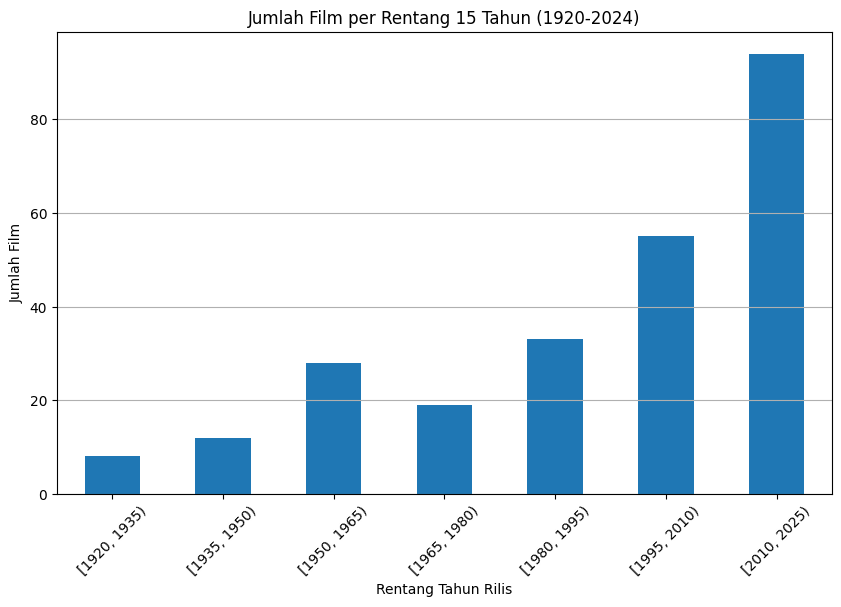

In [607]:
# Membuat kolom baru untuk rentang 15 tahun
a = pd.cut(df2['Release Year'], bins=range(1920, 2030, 15), right=False)

# Menghitung jumlah film per rentang 15 tahun
jumlah_film_per_rentang = a.value_counts().sort_index()

# Membuat box plot
plt.figure(figsize=(10, 6))
jumlah_film_per_rentang.plot(kind='bar')
plt.title('Jumlah Film per Rentang 15 Tahun (1920-2024)')
plt.xlabel('Rentang Tahun Rilis')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

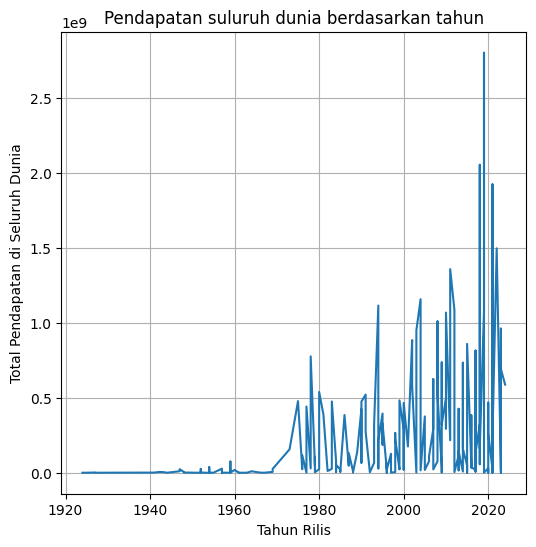

In [608]:
# Mengurutkan DataFrame berdasarkan tahun rilis secara ascending
df_sorted = df2.sort_values(by='Release Year')

# Mengatur ukuran gambar
plt.figure(figsize=(6, 6))

# Membuat line chart
plt.plot(df_sorted['Release Year'], df_sorted['Worldwide Gross'])

# Menambahkan judul dan label sumbu
plt.title('Pendapatan suluruh dunia berdasarkan tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Pendapatan di Seluruh Dunia')

plt.grid(True)
# Menampilkan plot
plt.show()

In [609]:
df2['Worldwide Gross'].max()

2799439100

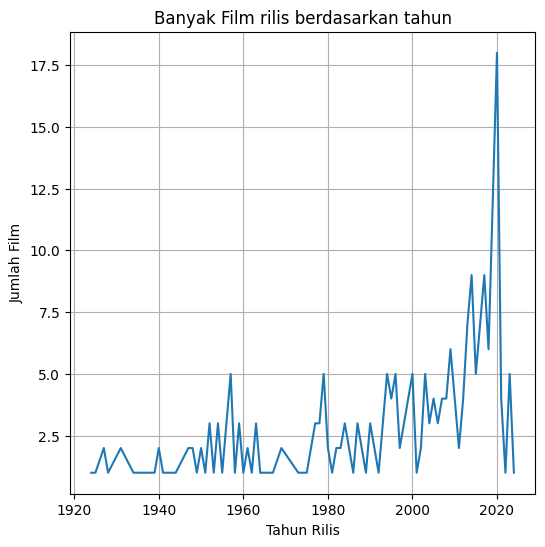

In [610]:
release = df2['Release Year'].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.plot(release)

# Menambahkan judul dan label sumbu
plt.title('Banyak Film rilis berdasarkan tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Film')

plt.grid(True)
# Menampilkan plot
plt.show()

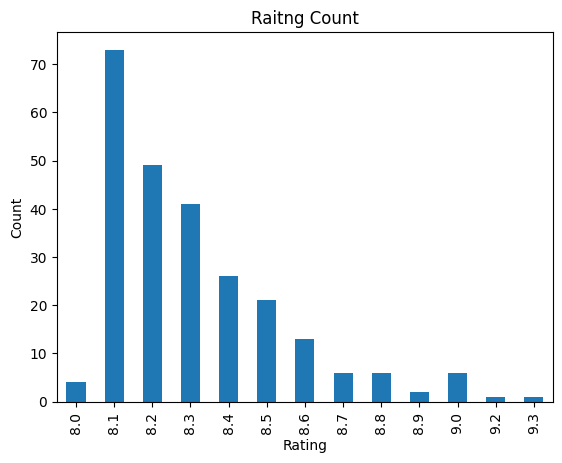

In [611]:
city = df2['Rating out of 10'].value_counts().sort_index()

city.plot(kind='bar')
plt.title('Raitng Count')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

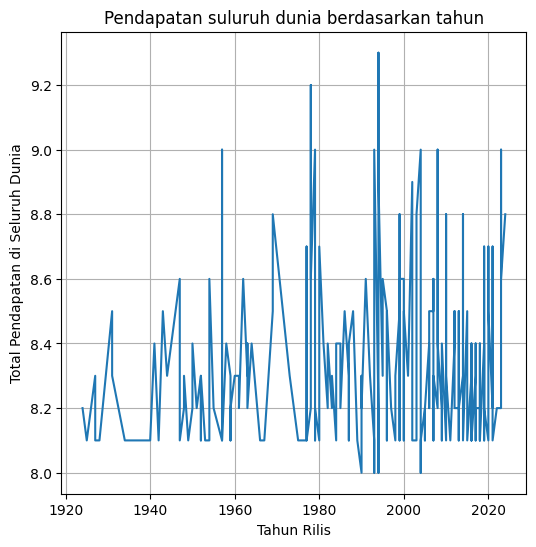

In [612]:
# Mengurutkan DataFrame berdasarkan tahun rilis secara ascending
df_sorted = df2.sort_values(by='Release Year')

# Mengatur ukuran gambar
plt.figure(figsize=(6, 6))

# Membuat line chart
plt.plot(df_sorted['Release Year'], df_sorted['Rating out of 10'])

# Menambahkan judul dan label sumbu
plt.title('Pendapatan suluruh dunia berdasarkan tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Total Pendapatan di Seluruh Dunia')

plt.grid(True)
# Menampilkan plot
plt.show()

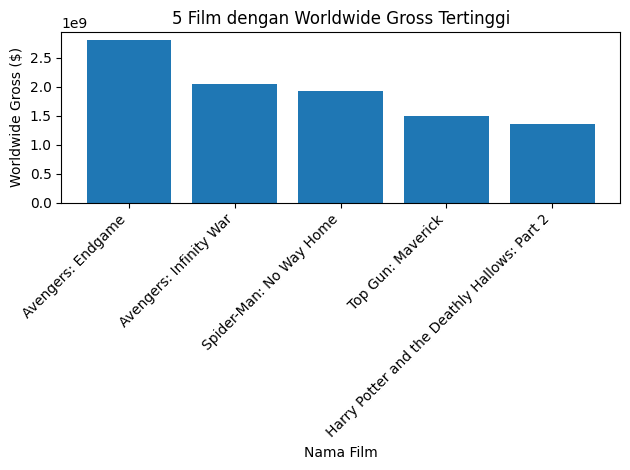

In [613]:
# Mengambil 5 film dengan nilai 'Worldwide Gross' tertinggi
top_5_movies = df2.nlargest(5, 'Worldwide Gross')

plt.bar(top_5_movies['Movies Names'], top_5_movies['Worldwide Gross'])

plt.title('5 Film dengan Worldwide Gross Tertinggi')
plt.xlabel('Nama Film')
plt.ylabel('Worldwide Gross ($)')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')
# Menampilkan plot
plt.tight_layout()
plt.show()

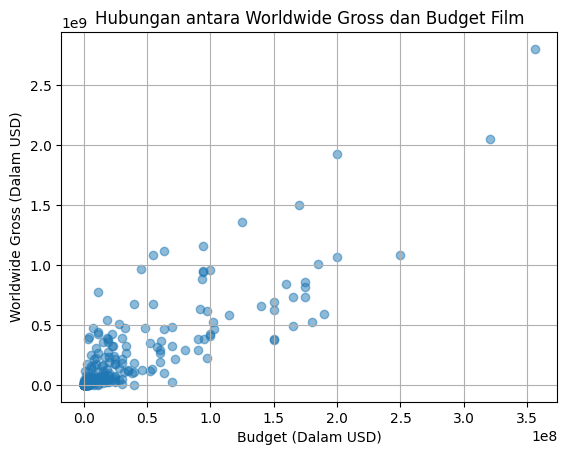

In [614]:
# membandingkan antara pendapatan dan biaya produksi
plt.scatter(df2['Budget'], df2['Worldwide Gross'], alpha=0.5)

# Menambahkan judul dan label sumbu
plt.title('Hubungan antara Worldwide Gross dan Budget Film')
plt.xlabel('Budget (Dalam USD)')
plt.ylabel('Worldwide Gross (Dalam USD)')

# Menambahkan grid
plt.grid(True)

# Menampilkan plot

plt.show()

In [615]:
high_budget = df2[df2['Budget'] == df2['Budget'].max()]
print(high_budget[['Movies Names', 'Budget', 'Worldwide Gross']])


         Movies Names       Budget  Worldwide Gross
79  Avengers: Endgame  356000000.0       2799439100


In [616]:
df2['Budget'].max()

356000000.0

## Kesimpulan
Budget yang tinggi tidak selamanya akan menghasilkan pendapatan yang tinggi juga, budget merupakan penunjang untuk menghasilkan film yang bagus, karena dapat menggunakan efek,cgi,dan properti yang bagus dan mahal biayanya untuk meningkatkan keindahan,kerealistisan film.
Akan tetapi berdasarkan scatter plot diatas pendapatan yang tinggi tidak menjadi faktor film akan mendapatkan penghasilan yang tinggi pula. Karena ada faktor lain seperti jalan cerita, agenda politik, dan pemain/aktor.